# 關聯分析 Relation Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## 載入資料
取`Gender`, `Age`, `Ori. Memb.`, `Year`, `Company`五個因素

In [2]:
boys=pd.read_csv("./data/kpop_idols_boy_groups.csv")
girls=pd.read_csv("./data/kpop_idols_girl_groups.csv")
yt=pd.read_csv("./data/youtube.csv")

In [3]:
boys.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No


In [4]:
girls.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,2018-05-02,Cube,6,6,NaN,Yes
1,15&,NaN,피프틴앤드,2012-10-05,JYP,2,2,NaN,No
2,2EYES,NaN,투아이즈,2013-07-20,SidusHQ,4,5,NaN,No
3,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
4,3YE,NaN,써드아이,2019-05-21,GH,3,3,NaN,Yes


In [5]:
yt.head()

,Name,Likes,Views,Comments
0,Agust D,14789093,440680241,1368508
1,Yubin,53417,1184355,2722
2,OnlyOneOf,84201,7565503,3991
3,Ryu Sujeong,43261,2663252,3501
4,Crush,663312,18036625,31992


In [12]:
# boys資料前處理
boys["Gender"]="M"
boys_n=boys.drop(["Short", "Korean Name", "Members", "Fanclub Name", "Active"], axis=1)

# girls資料前處理
girls["Gender"]="F"
girls_n=girls.drop(["Short", "Korean Name", "Members", "Fanclub Name", "Active"], axis=1)

# merge
Factors=pd.merge(boys_n, girls_n, how="outer")
Factors["Debut"]=pd.to_datetime(Factors["Debut"], format='%Y-%m-%d')
# Factors["Debut"]=pd.to_datetime(Factors["Debut"]).dt.year
Factors.set_index("Name", inplace=True)
Factors=Factors.sort_values("Debut")
Factors.head()

,Debut,Company,Orig. Memb.,Gender
Name,,,,
Turbo,1995-09-06,"MBK, Turbo Co.",2,M
H.O.T,1996-09-07,SM,5,M
SECHKIES,1997-04-15,"DSP, YG",6,M
Baby V.O.X,1997-07-05,DR Music,5,F
S.E.S,1997-11-01,SM,3,F


## 散佈圖 Scatter Plot

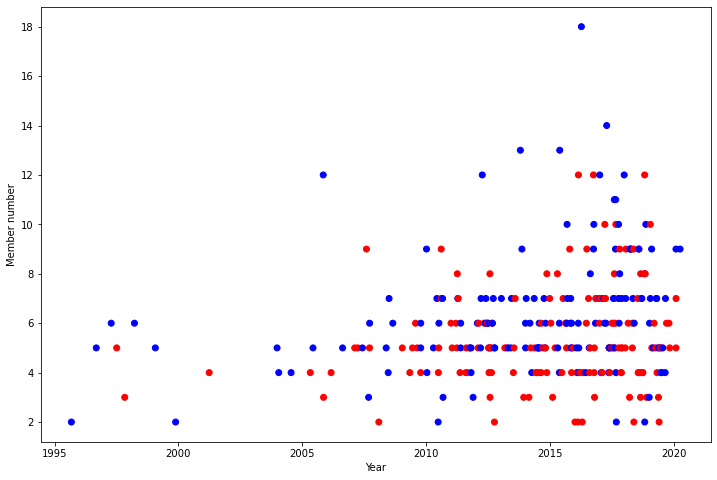

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(Factors["Debut"], Factors["Orig. Memb."], c=Factors["Gender"].map({"M": "blue", "F": "red"}))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))
plt.xlabel("Year")
plt.ylabel("Member number")
#plt.title("")
#plt.legend()
plt.show()